In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('../data/complaints.csv')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517620 entries, 0 to 1517619
Data columns (total 18 columns):
Date received                   1517620 non-null object
Product                         1517620 non-null object
Sub-product                     1282455 non-null object
Issue                           1517620 non-null object
Sub-issue                       957685 non-null object
Consumer complaint narrative    499118 non-null object
Company public response         572138 non-null object
Company                         1517620 non-null object
State                           1492059 non-null object
ZIP code                        1374900 non-null object
Tags                            206318 non-null object
Consumer consent provided?      898083 non-null object
Submitted via                   1517620 non-null object
Date sent to company            1517620 non-null object
Company response to consumer    1517619 non-null object
Timely response?                1517620 non-null obj

In [164]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


In [165]:
df.count()

Date received                   1517620
Product                         1517620
Sub-product                     1282455
Issue                           1517620
Sub-issue                        957685
Consumer complaint narrative     499118
Company public response          572138
Company                         1517620
State                           1492059
ZIP code                        1374900
Tags                             206318
Consumer consent provided?       898083
Submitted via                   1517620
Date sent to company            1517620
Company response to consumer    1517619
Timely response?                1517620
Consumer disputed?               768479
Complaint ID                    1517620
dtype: int64

In [166]:
df['Date'] = pd.to_datetime(df['Date received'],infer_datetime_format=True)
print(df['Date'].min())
print(df['Date'].max())
df.info()

2011-12-01 00:00:00
2020-02-29 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517620 entries, 0 to 1517619
Data columns (total 19 columns):
Date received                   1517620 non-null object
Product                         1517620 non-null object
Sub-product                     1282455 non-null object
Issue                           1517620 non-null object
Sub-issue                       957685 non-null object
Consumer complaint narrative    499118 non-null object
Company public response         572138 non-null object
Company                         1517620 non-null object
State                           1492059 non-null object
ZIP code                        1374900 non-null object
Tags                            206318 non-null object
Consumer consent provided?      898083 non-null object
Submitted via                   1517620 non-null object
Date sent to company            1517620 non-null object
Company response to consumer    1517619 non-null object
Timely respo

In [167]:
df_grouped = df.groupby('Company').count()[['Complaint ID']]

In [168]:
df1 = df_grouped.sort_values('Complaint ID', ascending=False).head(20)

In [169]:
df1.insert(loc=1, column='Top 20', value=np.arange(len(df1)) +1)
df1.rename(columns={'Complaint ID':"Issue Counts"})

,Issue Counts,Top 20
Company,,
"EQUIFAX, INC.",152828,1
Experian Information Solutions Inc.,135725,2
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",132287,3
"BANK OF AMERICA, NATIONAL ASSOCIATION",88680,4
WELLS FARGO & COMPANY,76625,5
JPMORGAN CHASE & CO.,66665,6
"CITIBANK, N.A.",54764,7
CAPITAL ONE FINANCIAL CORPORATION,41312,8
"Navient Solutions, LLC.",31845,9


In [170]:
df_issues_dates = df.groupby('Date').count()[['Complaint ID']]
df_issues_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3012 entries, 2011-12-01 to 2020-02-29
Data columns (total 1 columns):
Complaint ID    3012 non-null int64
dtypes: int64(1)
memory usage: 47.1 KB


In [171]:
df_issues_dates = df_issues_dates.reset_index()
df_issues_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 2 columns):
Date            3012 non-null datetime64[ns]
Complaint ID    3012 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 47.2 KB


In [172]:
df_issues_dates = df_issues_dates.rename(columns={'Complaint ID':"Issue Counts"})

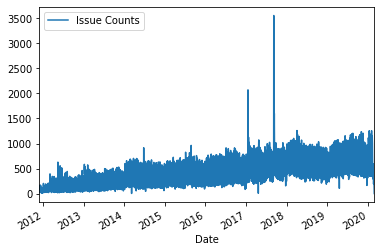

In [173]:
ax = plt.gca()
df_issues_dates.plot(kind='line',x='Date',y='Issue Counts',ax=ax)